In [212]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [213]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [214]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [215]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [216]:
df.duplicated().sum()

0

In [217]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [218]:
df.Surname.value_counts

<bound method IndexOpsMixin.value_counts of 0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object>

In [219]:
df.drop(['RowNumber', 'CustomerId','Surname','Age'],axis='columns',inplace=True)
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,2,125510.82,1,1,1,79084.10,0


In [220]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [255]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
le=LabelEncoder()
m=MinMaxScaler()
# s=StandardScaler()
cols=['Balance','EstimatedSalary','CreditScore']
df['Gender']=le.fit_transform(df['Gender'])
df[cols]=m.fit_transform(df[cols])
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,0,2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,0,1,0.334031,1,0,1,0.562709,0
2,0.304,France,0,8,0.636357,3,1,0,0.569654,1
3,0.698,France,0,1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,0,2,0.500246,1,1,1,0.395400,0


In [256]:
df1= pd.get_dummies(df, columns=['Geography'], drop_first=True,dtype='int')
# Print the DataFrame with dummy variables
df1.head()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,0,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,0,1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,0,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0,2,0.500246,1,1,1,0.395400,0,0,1


In [257]:
df1.shape

(10000, 11)

In [258]:
df1.head()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,0,2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,0,1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0,8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,0,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0,2,0.500246,1,1,1,0.395400,0,0,1


In [259]:
df1.shape

(10000, 11)

In [260]:
x=df1.drop('Exited',axis='columns')
y=df1.Exited

In [261]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [262]:
x_train.shape
# y_train.shape

(8000, 10)

In [263]:
df1.dtypes

CreditScore          float64
Gender                 int32
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int32
Geography_Spain        int32
dtype: object

In [264]:
x_train.shape

(8000, 10)

In [265]:
y_train.shape

(8000,)

In [266]:
model=keras.Sequential([

keras.layers.Dense(1,input_shape=(10,),activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',
metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=10)

Epoch 1/10


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2953 - loss: 1.0684
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7832 - loss: 0.5526
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7964 - loss: 0.5126
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7961 - loss: 0.5062
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7942 - loss: 0.5004
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7931 - loss: 0.4984
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7997 - loss: 0.4857
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7870 - loss: 0.4949
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7977 - loss: 0.4808
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7922 - loss: 0.4855


In [267]:
model.evaluate(x_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.4669


[0.4674926698207855, 0.8040000200271606]

In [268]:
pred=model.predict(x_test)
pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.25425526],
       [0.10109083],
       [0.20539387],
       ...,
       [0.25064555],
       [0.18613146],
       [0.25964862]], dtype=float32)

In [269]:
y_pred=[]
for i in pred:
    if i<0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [270]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       1.00      0.00      0.01       393

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.45      2000
weighted avg       0.84      0.80      0.72      2000



In [273]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1607,    0],
       [ 392,    1]])>

Text(50.722222222222214, 0.5, 'truth')

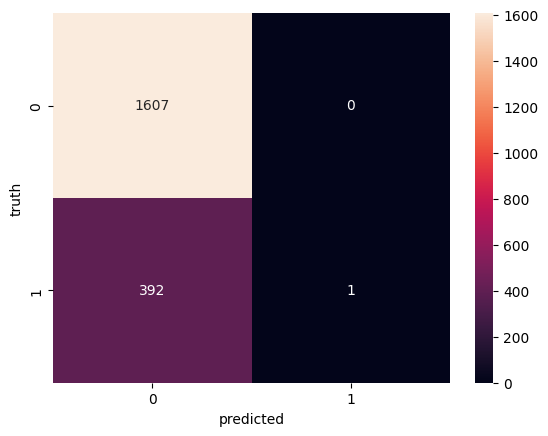

In [274]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')